In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('Train: \n')
train.info()
print('\nTest: \n')
test.info()

Train: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           

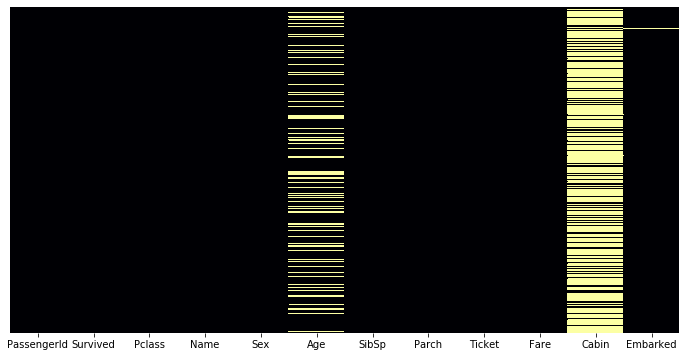

In [6]:
plt.figure(figsize=(12,6))
sb.heatmap(data = train.isnull(), cmap ='inferno', cbar = 0, yticklabels=0)

In [7]:
train.drop(['Cabin'], axis = 1, inplace = True ) # Removendo a coluna de cabines

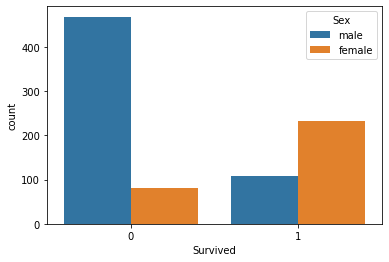

In [8]:
sb.countplot(train['Survived'], hue = train['Sex']) # Vendo qtd de sobreviventes por sexo

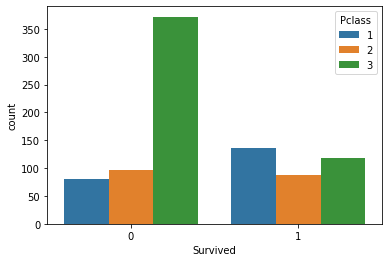

In [9]:
sb.countplot(train['Survived'], hue = train['Pclass']) # Vendo qtd de sobreviventes por classe

### Preenchendo os dados faltantes da coluna Age

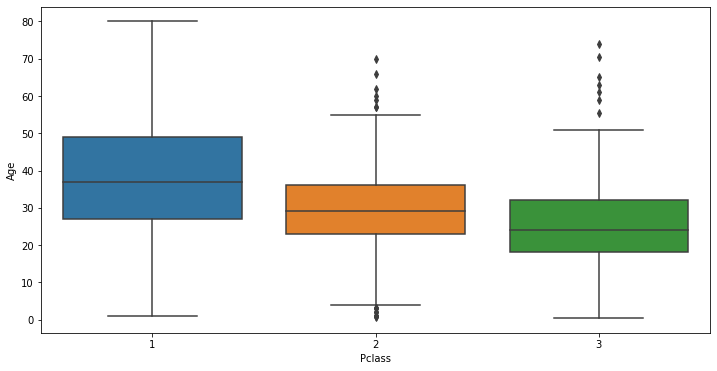

In [10]:
plt.figure(figsize = (12,6))
x = sb.boxplot(x = 'Pclass', y = 'Age', data = train) # boxplot para ver a média das idades por classe

In [11]:
# Função preenche com a idade média por classe
def input_age(cols):
    age = cols[0] 
    _class = cols[1]
    
    if pd.isnull(age):
        if _class == 1:
            return 37
        elif _class == 2:
            return 30
        else:
            return 24
    else:
        return age

In [12]:
train['Age'] = train[['Age','Pclass']].apply(input_age, axis = 1)

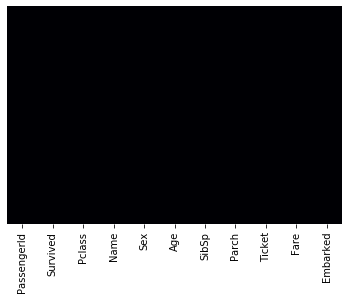

In [13]:
sb.heatmap(data = train.isnull(), cmap ='inferno', cbar = 0, yticklabels=0)

### Transformando strings em dados numéricos

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
train.drop(['Name','Ticket'], axis = 1, inplace = True) # Removendo a coluna de nome e ticket

In [16]:
sex = pd.get_dummies(train['Sex'], drop_first = True) # Transformando coluna de sexo em 'booleano'
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [17]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [18]:
train = pd.concat([train,sex,embark],axis = 1) # Adicionando sex e embark a tabela

In [19]:
train.drop(['Sex', 'Embarked'], inplace = True, axis = 1)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
logmodel = LogisticRegression()

In [22]:
logmodel.fit(train.drop('Survived', axis = 1), train['Survived']) # Treinando o modelo

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Tratando os dados de teste

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

In [25]:
test['Age'] = test[['Age','Pclass']].apply(input_age, axis = 1)

In [26]:
sex = pd.get_dummies(test['Sex'], drop_first = True)

In [27]:
embark = pd.get_dummies(test['Embarked'], drop_first = True)

In [28]:
test = pd.concat([test,sex,embark], axis = 1)

In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,1,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1


In [30]:
test.drop(['Embarked', 'Sex'], axis = 1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,24.0,0,0,8.0500,1,0,1


In [31]:
test.drop(['Embarked', 'Sex'],axis = 1, inplace = True)

In [32]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,24.0,0,0,8.0500,1,0,1


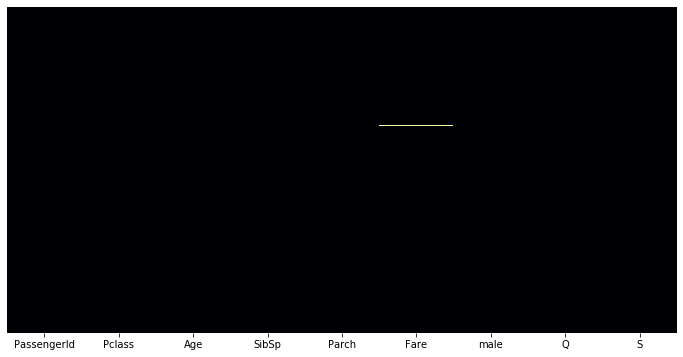

In [35]:
plt.figure(figsize=(12,6))
sb.heatmap(data = test.isnull(), cmap ='inferno', cbar = 0, yticklabels=0)

In [36]:
test.fillna(value = 1.0, inplace = True) # 

In [37]:
predictions = logmodel.predict(test) # 

In [38]:
df = pd.DataFrame(predictions)

In [39]:
df

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [41]:
p_id = pd.DataFrame(test['PassengerId'])

In [42]:
p_id

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [44]:
results = pd.concat([p_id, df], axis = 1)

In [45]:
results

,PassengerId,0
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
0              418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [47]:
results.rename(columns={0: "Survived"}, inplace = True)

In [48]:
results.fillna(value = 1.0, inplace = True) # Preenchendo a última linha da coluna survived com valor 1

# Mudar o valor do dado faltante no teste (Testes)

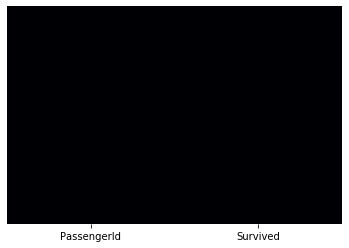

In [55]:
sb.heatmap(data = results.isnull(), cmap ='inferno', cbar = 0, yticklabels=0)

In [59]:
results.iloc[152]

PassengerId    1044
Survived          0
Name: 152, dtype: int64

In [60]:
results.to_csv('results2.csv', index = False) # Salvando os resultados num arquivo .csv